In [30]:
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Import data

In [5]:
DATAPATH ='/content/abalone (2).zip'  # Replace with the actual path

# Open the zip file
with zipfile.ZipFile(DATAPATH, 'r') as zip_ref:
    # the CSV file is named 'abalone.data'
    csv_file_path = 'abalone.data'
    with zip_ref.open(csv_file_path) as f:
        # Read the CSV file from within the zip
        data = pd.read_csv(f, header=None, index_col=False)

# Set column names
data.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
print(data.head())

  sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [6]:
data

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
data.dropna(inplace=True) #deoping rows with missing values

In [8]:
# Set column names
data.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
print(data.head())

# Assuming 'sex' is a categorical feature
data = pd.get_dummies(data, columns=['sex'], drop_first=True) # Now this should work

  sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


# Dependent and Independent variables
## dependent:
### rings
## independent:
### sex, length, diameter, height, whole_weight, shucked_weight, viscera_weight, shell_weight.

In [9]:
x=data.drop('rings' , axis=1)
y=data['rings']

In [10]:
x.shape,y.shape

((4177, 9), (4177,))

In [12]:
print(x)

      length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      shell_weight  sex_I  sex_M  
0   

In [13]:
print(y)

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: rings, Length: 4177, dtype: int64


## Split the data

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [15]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3132, 9), (1045, 9), (3132,), (1045,))

# 3.1 Linear Regression Model

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [18]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming 'data' is your dictionary, convert it to a DataFrame
df = pd.DataFrame(data)

# Calculate MSE and R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
MAPE=mean_absolute_percentage_error(y_test,y_pred)

print("Linear Regression")
print(f'Mean Squared Error(MSE): {mse}')
print(f'R^2 Score(R2): {r2}')
print(f'Mean absolute error(MAE): {mean_absolute_error(y_test, y_pred)}')
print(f'Mean absolute percentage error(MAPE): {MAPE}')

Linear Regression
Mean Squared Error(MSE): 4.675903975878888
R^2 Score(R2): 0.5454718270324019
Mean absolute error(MAE): 1.5693587109234113
Mean absolute percentage error(MAPE): 0.15965791631435214


In [19]:
print('coefficients:', model.coef_)
print('intercept:', model.intercept_)

coefficients: [ -0.09841272  11.19617907  10.16767658   8.88350763 -20.58623956
  -9.63804181   9.47797609  -0.73762021   0.10029165]
intercept: 3.726107905329126


# 3.2 Support Vector Machine(SVM):

In [20]:
# Standardized version

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)

X_train_std = sc.transform(x_train)
X_test_std = sc.transform(x_test)

In [21]:
# List of kernels to evaluate
kernels = ['linear', 'poly', 'rbf']

In [22]:
result_dict = {}

# Loop over each kernel
for i, kernel in enumerate(kernels):
    # Initialize and fit the model
    model_svm = SVR(kernel=kernel)
    model_svm.fit(X_train_std, y_train)

    # Predict on the test set
    pred_svm = model_svm.predict(X_test_std)

    # Store evaluation metrics
    result_dict[kernel] = [
        mean_squared_error(y_test, pred_svm),
        mean_absolute_error(y_test, pred_svm),
        mean_absolute_percentage_error(y_test, pred_svm),
        r2_score(y_test, pred_svm)
    ]

# Convert results to a DataFrame
result = pd.DataFrame(result_dict, index=['MSE', 'MAE', 'MAPE', 'R2'])

# Transpose the DataFrame for better readability
result = result.T
print(result)

             MSE       MAE      MAPE        R2
linear  4.788017  1.526880  0.147777  0.534574
poly    5.423970  1.547286  0.147386  0.472755
rbf     4.627016  1.480766  0.142497  0.550224


In [23]:
y_pred = model_svm.predict(X_test_std) # Use predict to generate predictions on new data
print(y_pred[:10])

[11.53378173  9.74285609 13.71061447 11.15591132 11.47385855  9.60401582
  8.9347086   8.61503246  6.76151485  9.91864361]


In [24]:
print(y_test[:10].values)

[ 9  8 16  9 14 11  7  6  7 10]


# 3.3 Decision tree

In [26]:
# Initialize the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
decision_tree.fit(X_train_std, y_train)

# Predict on the testing data
y_pred1 = decision_tree.predict(X_test_std)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
mape= mean_absolute_percentage_error(y_test, y_pred1)

print("Decision Tree Regressor")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")
print("Mean absolute error(MAE) %.2f"%mae)
print("Mean absolute percentage error(MAPE) %.2f"%mape)

Decision Tree Regressor
Mean Squared Error (MSE): 8.807655502392345
R-squared (R2) Score: 0.14383879902539387
Mean absolute error(MAE) 2.04
Mean absolute percentage error(MAPE) 0.20


# 3.4 Random Forest

In [27]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train_std, y_train) #Training the model on the training data

RandomForestRegressor(random_state=42)

In [28]:
y_pred2 = random_forest.predict(X_test_std)

mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
mape= mean_absolute_percentage_error(y_test, y_pred2)


print("Random Forest Regressor")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")
print("Mean absolute error(MAE) %.2f"%mae)
print("Mean absolute percentage error(MAPE) %.2f"%mape)

Random Forest Regressor
Mean Squared Error (MSE): 4.805265550239234
R-squared (R2) Score: 0.5328970435574765
Mean absolute error(MAE) 1.56
Mean absolute percentage error(MAPE) 0.16


# 3.5 Adaboost

In [ ]:
# Using DecisionTreeRegressor with a max depth of 3 as the base estimator
base_estimator = DecisionTreeRegressor(max_depth=3)
adaboost = AdaBoostRegressor(base_estimator=base_estimator, random_state=42, n_estimators=50)
adaboost.fit(X_train_std, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  random_state=42)

In [32]:
# Using DecisionTreeRegressor with a max depth of 3 as the base estimator
base_estimator = DecisionTreeRegressor(max_depth=3)
adaboost = AdaBoostRegressor(base_estimator=base_estimator, random_state=42, n_estimators=50)
adaboost.fit(X_train_std, y_train) # Define adaboost here

y_pred3 = adaboost.predict(X_test_std)

mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
mae = mean_absolute_error(y_test, y_pred3)
mape= mean_absolute_percentage_error(y_test, y_pred3)


print("Adaboost Regressor")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")
print("Mean absolute error(MAE) %.2f"%mae)
print("Mean absolute percentage error(MAPE) %.2f"%mape)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Adaboost Regressor
Mean Squared Error (MSE): 9.01497758062926
R-squared (R2) Score: 0.12368574927865306
Mean absolute error(MAE) 2.60
Mean absolute percentage error(MAPE) 0.29


# 3.6 Gradient Boosting

In [33]:
gradient_boosting = GradientBoostingRegressor(random_state=42)
gradient_boosting.fit(X_train_std, y_train)

GradientBoostingRegressor(random_state=42)

In [35]:
y_pred4 = gradient_boosting.predict(X_test_std)

mse = mean_squared_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)
mae = mean_absolute_error(y_test, y_pred4)
mape= mean_absolute_percentage_error(y_test, y_pred4)


print("Gradient Boosting Regressor")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")
print("Mean absolute error(MAE) %.2f"%mae)
print("Mean absolute percentage error(MAPE) %.2f"%mape)

Gradient Boosting Regressor
Mean Squared Error (MSE): 4.7367260255976165
R-squared (R2) Score: 0.5395595295863018
Mean absolute error(MAE) 1.54
Mean absolute percentage error(MAPE) 0.15


# 3.7 Results

In [39]:
# Defining model and their coressponding matrix
M= [ 'Linear Regression','SVM(linear)','SVM(poly)','SVM(rbf)','Decision Tree','Random Forest','Adaboost','Gradient Boosting']
MSE=[4.6759,4.7880,5.4239,4.6270,8.8076,4.8052,9.0149,4.7367]
R2=[0.5454,0.5345,0.4727, 0.5502,0.1438,0.5328,0.1236,0.5395]
MAE=[1.5693,1.5268,1.5472,1.4807,2.04,1.56,2.60,1.54]
MAPE=[0.1596,0.14777,0.14738,0.14249,0.20, 0.16, 0.29,]

In [42]:
# Creating a DataFrame
data = {
    'Model': M,
    'MSE': MSE,
    'R2': R2,
    'MAE': MAE,
    'MAPE':MAPE,
}
df = pd.DataFrame(data)

# Display the table
print(df)

               Model     MSE      R2     MAE     MAPE
0  Linear Regression  4.6759  0.5454  1.5693  0.15960
1        SVM(linear)  4.7880  0.5345  1.5268  0.14777
2          SVM(poly)  5.4239  0.4727  1.5472  0.14738
3           SVM(rbf)  4.6270  0.5502  1.4807  0.14249
4      Decision Tree  8.8076  0.1438  2.0400  0.20000
5      Random Forest  4.8052  0.5328  1.5600  0.16000
6           Adaboost  9.0149  0.1236  2.6000  0.29000
7  Gradient Boosting  4.7367  0.5395  1.5400  0.15000


<ipython-input-38-bbf63f37246b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(df['Model'], rotation=45, ha='right')
<ipython-input-38-bbf63f37246b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(df['Model'], rotation=45, ha='right')
<ipython-input-38-bbf63f37246b>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(df['Model'], rotation=45, ha='right')


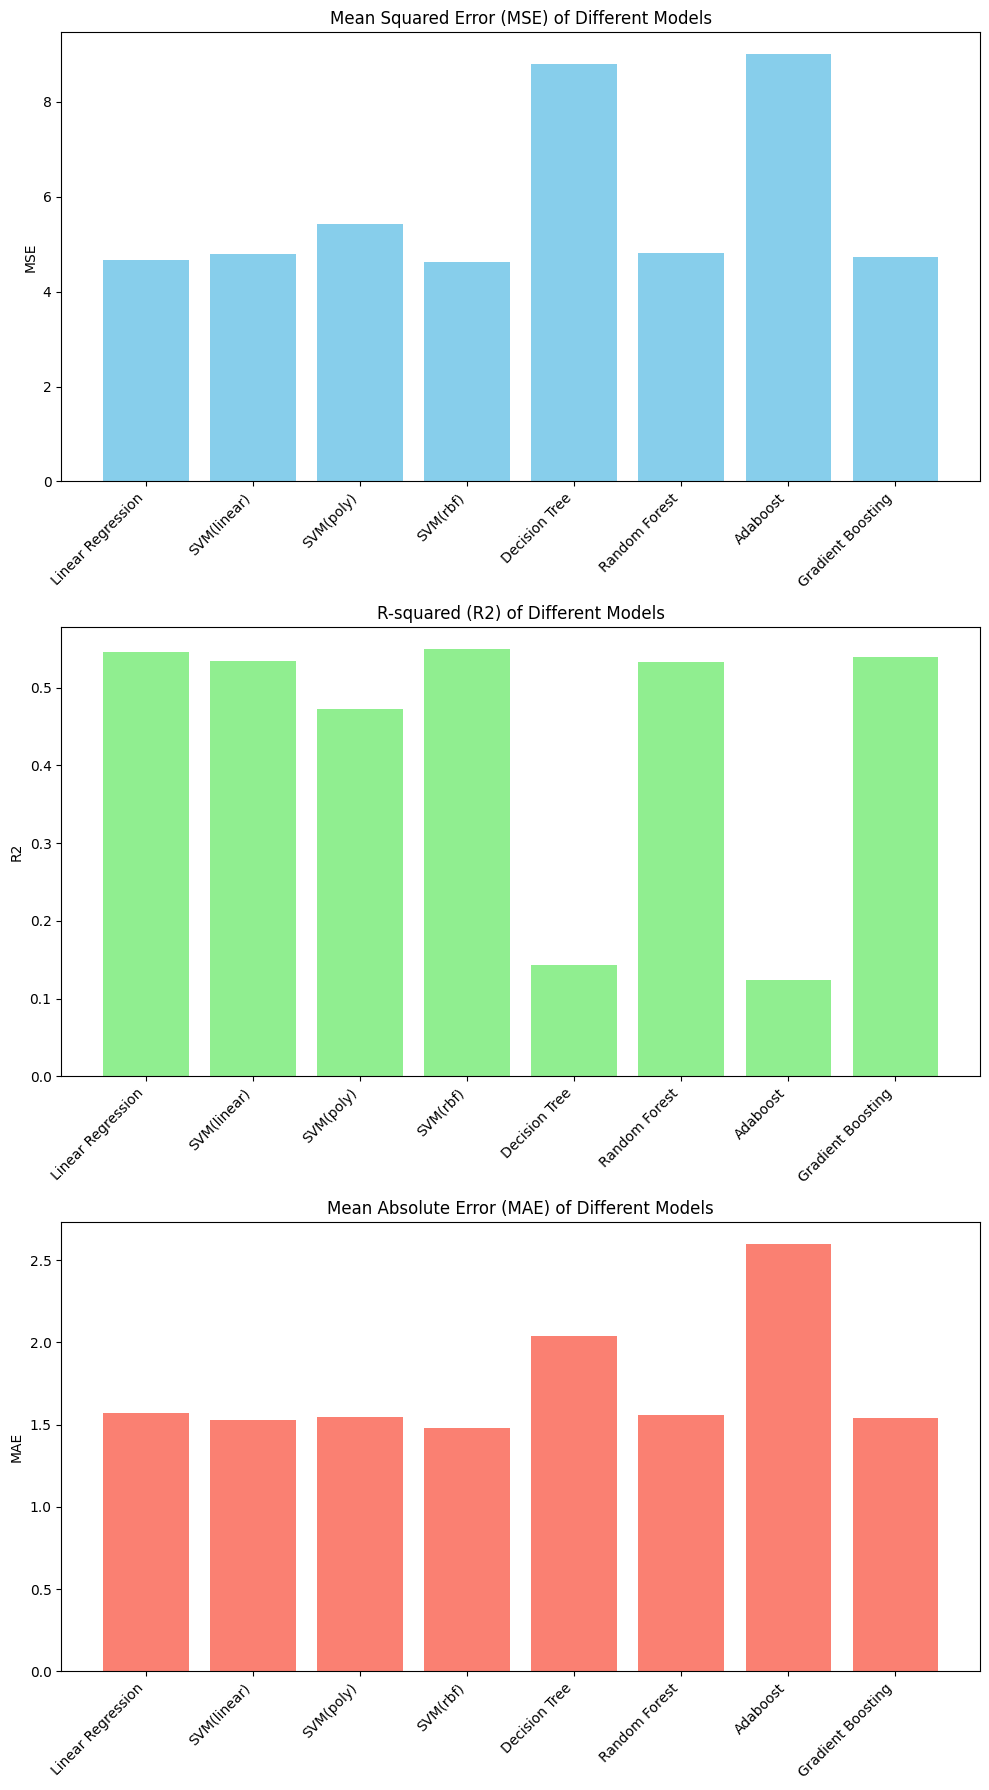

In [38]:
# Plotting the bar graphs
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plotting MSE
axs[0].bar(df['Model'], df['MSE'], color='skyblue')
axs[0].set_title('Mean Squared Error (MSE) of Different Models')
axs[0].set_ylabel('MSE')
axs[0].set_xticklabels(df['Model'], rotation=45, ha='right')

# Plotting R2
axs[1].bar(df['Model'], df['R2'], color='lightgreen')
axs[1].set_title('R-squared (R2) of Different Models')
axs[1].set_ylabel('R2')
axs[1].set_xticklabels(df['Model'], rotation=45, ha='right')

# Plotting MAE
axs[2].bar(df['Model'], df['MAE'], color='salmon')
axs[2].set_title('Mean Absolute Error (MAE) of Different Models')
axs[2].set_ylabel('MAE')
axs[2].set_xticklabels(df['Model'], rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()
